In [125]:
# In efforts to improving the care conditions at a hospital in the province of Greenland, the following is a model which probes 
# into the historic survival data of the patients and predicts their chances of survival after 1 year of treatment.

In [126]:
# Load dependencies

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [128]:
dataset = pd.read_csv('./hospital_dataset/Train_Data.csv')

In [129]:
# View the first 5 rows of the dataset

In [130]:
dataset.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [131]:
# Find out more information about the dataset

In [132]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [133]:
# See statistical representation of the dataset

In [134]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_Patient_Care_Situation,23097.0,16545.712041,9532.263503,2.0000,8280.00000,16597.000000,24825.000000,33014.000000
Diagnosed_Condition,23097.0,26.413127,15.030865,0.0000,13.00000,26.000000,39.000000,52.000000
Patient_ID,23097.0,6261.280772,3595.990620,1.0000,3181.00000,6242.000000,9363.000000,12515.000000
Patient_Age,23097.0,33.209768,19.549882,0.0000,16.00000,33.000000,50.000000,149.000000
Patient_Body_Mass_Index,23097.0,23.454820,3.807661,1.0893,20.20555,23.386199,26.788154,29.999579
A,21862.0,0.897905,0.302780,0.0000,1.00000,1.000000,1.000000,1.000000
B,21862.0,0.136355,0.343173,0.0000,0.00000,0.000000,0.000000,1.000000
C,21862.0,0.185070,0.388363,0.0000,0.00000,0.000000,0.000000,1.000000
D,21862.0,0.083615,0.276817,0.0000,0.00000,0.000000,0.000000,1.000000
E,21862.0,0.393239,0.488480,0.0000,0.00000,0.000000,1.000000,1.000000


In [135]:
# check for null values

In [136]:
dataset.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [137]:
# The following shows that every feature has got not more than 20% of mising data so, they'd all be considered

In [138]:
dataset.isnull().mean() <= 0.2

ID_Patient_Care_Situation    True
Diagnosed_Condition          True
Patient_ID                   True
Treated_with_drugs           True
Patient_Age                  True
Patient_Body_Mass_Index      True
Patient_Smoker               True
Patient_Rural_Urban          True
Patient_mental_condition     True
A                            True
B                            True
C                            True
D                            True
E                            True
F                            True
Z                            True
Number_of_prev_cond          True
Survived_1_year              True
dtype: bool

In [139]:
# scan for numerical variables

In [140]:
numerical_data = dataset.select_dtypes(include=np.number)

In [141]:
# Numerical columns

In [142]:
numerical_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year'],
      dtype='object')

In [143]:
# Fill in the missing values on the numerical dataset

In [144]:
for col in numerical_data.columns:
    dataset[col] = dataset[col].fillna(dataset[col].mean())

In [145]:
dataset[numerical_data.columns].isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Patient_Age                  0
Patient_Body_Mass_Index      0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [146]:
# Check for categorical features

In [147]:
cat_data = dataset.select_dtypes(include='object')

In [148]:
# Categorical columns

In [149]:
cat_data.columns

Index(['Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban',
       'Patient_mental_condition'],
      dtype='object')

In [150]:
dataset[cat_data.columns].isnull().sum()

Treated_with_drugs          13
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
dtype: int64

In [151]:
# Fill in null values on the "Treated_with_drugs" column of the categprical dataset

In [152]:
dataset['Treated_with_drugs'] = dataset['Treated_with_drugs'].fillna(dataset['Treated_with_drugs'].mode().iloc[0])

In [153]:
# Double check for missing values

In [154]:
dataset.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [155]:
# Convert categorical values into numerical values

In [156]:
from sklearn.preprocessing import LabelEncoder

In [157]:
encoder = LabelEncoder()

In [158]:
for column in cat_data.columns:
    dataset[column] = encoder.fit_transform(dataset[column])

In [159]:
dataset.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,31,56,18.479385,2,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,16,36,22.945566,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,31,48,27.510027,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,0,5,19.130976,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,31,128,1.348400,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [160]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  int32  
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  int32  
 7   Patient_Rural_Urban        23097 non-null  int32  
 8   Patient_mental_condition   23097 non-null  int32  
 9   A                          23097 non-null  float64
 10  B                          23097 non-null  float64
 11  C                          23097 non-null  float64
 12  D                          23097 non-null  float64
 13  E                          23097 non-null  flo

In [161]:
training_data = dataset.drop('Survived_1_year',axis=1)

In [162]:
test_data = dataset['Survived_1_year']

In [163]:
training_data.shape

(23097, 17)

In [164]:
test_data.shape

(23097,)

In [165]:
# Normalize training dataset

In [166]:
from sklearn.preprocessing import MinMaxScaler

In [167]:
scaler = MinMaxScaler()

In [168]:
scaled_training_data = scaler.fit_transform(training_data)

In [169]:
pd.DataFrame(scaled_training_data,columns=training_data.columns).head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,0.677693,0.153846,0.266262,1.000000,0.375839,0.601519,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.25
1,0.550164,0.096154,0.458606,0.516129,0.241611,0.756003,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,0.190264,0.442308,0.834665,1.000000,0.322148,0.913887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.161668,0.980769,0.959725,0.000000,0.033557,0.624057,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,0.999939,0.000000,0.999840,1.000000,0.859060,0.008962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00


<AxesSubplot:xlabel='Survived_1_year'>

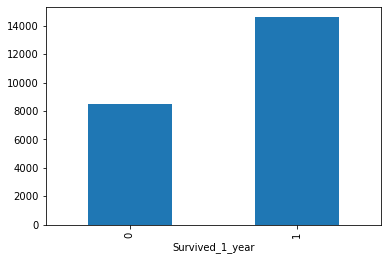

In [170]:
dataset.pivot_table(index='Survived_1_year',aggfunc='size').plot(kind='bar')

In [171]:
# From the given plot above,there seems to exist an imbalance between both classes of the dependent variable(Survived_1_year)

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train,X_test,y_train,y_test = train_test_split(training_data,test_data,test_size=0.2,random_state=123)

In [174]:
from imblearn.over_sampling import SMOTE

In [175]:
sm = SMOTE(random_state=25,sampling_strategy=1.0)

In [176]:
X_train, y_train = sm.fit_resample(X_train,y_train)

In [177]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([11688, 11688], dtype=int64))

In [178]:
# Balance now established on the training dataset

In [179]:
# Import LogisticRegression

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
log_model = LogisticRegression()

In [182]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [183]:
log_pred = log_model.predict(X_test)

In [184]:
from sklearn.metrics import f1_score

In [185]:
f1_score(y_test,log_pred)

0.5330756013745704

In [186]:
# For want of a superior performance, try a different model(DecisionTreeClassifier)

In [187]:
from sklearn.tree import DecisionTreeClassifier

In [188]:
decision_model = DecisionTreeClassifier()

In [189]:
decision_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [190]:
from sklearn.metrics import accuracy_score,f1_score
d_pred = decision_model.predict(X_train)
f1_score(y_train,d_pred)

1.0

In [191]:
f1_score(y_test,decision_model.predict(X_test))

0.784711111111111

In [192]:
# Model clearly performs better on training dataset which is by no means a great performance(overfitting)

In [193]:
# Prune the model

In [194]:
d_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [195]:
d_tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [196]:
f1_score(y_train,d_tree_classifier.predict(X_train))

0.7012987012987012

In [197]:
f1_score(y_test,d_tree_classifier.predict(X_test))

0.7830051057622173

In [198]:
# This time, model awesomely performs better on the test dataset

In [199]:
from sklearn.model_selection import cross_val_score

In [200]:
cv_score = cross_val_score(d_tree_classifier,X_train,y_train,cv=10,scoring='f1')

In [201]:
cv_score

array([0.71683673, 0.73445378, 0.75376021, 0.73441503, 0.72896406,
       0.72036349, 0.65412668, 0.66793458, 0.64875095, 0.66615385])

In [202]:
print('Average training score: ', cv_score.mean())
print('Standard deviation training score: ', cv_score.std())

Average training score:  0.7025759345482623
Standard deviation training score:  0.036928183361017955


In [203]:
for depth in range(2,20):
    print('with depth value of: ', depth)
    cv_score = cross_val_score(DecisionTreeClassifier(max_depth=depth, max_features=None),X_train,y_train,cv=10,scoring='f1')
    print(' Average training score: ',cv_score.mean())
    print(' Standard deviation training score: ',cv_score.std())

with depth value of:  2
 Average training score:  0.6561351585434314
 Standard deviation training score:  0.028803856812817573
with depth value of:  3
 Average training score:  0.7012770568526714
 Standard deviation training score:  0.038152657742486565
with depth value of:  4
 Average training score:  0.7037549978523708
 Standard deviation training score:  0.020575474201565795
with depth value of:  5
 Average training score:  0.6844965534477139
 Standard deviation training score:  0.01063751291044296
with depth value of:  6
 Average training score:  0.7163155163436177
 Standard deviation training score:  0.015528078574566484
with depth value of:  7
 Average training score:  0.7458096765787242
 Standard deviation training score:  0.012478727436845862
with depth value of:  8
 Average training score:  0.7604379266648269
 Standard deviation training score:  0.012046634468846053
with depth value of:  9
 Average training score:  0.7749939088373345
 Standard deviation training score:  0.0096

In [204]:
improved_model_2 = DecisionTreeClassifier(max_depth=11)

In [205]:
improved_model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11)

In [206]:
print('Training F1 score: ', f1_score(y_train,improved_model_2.predict(X_train)))
print('Testing F1 score: ', f1_score(y_test,improved_model_2.predict(X_test)))

Training F1 score:  0.8645225795700716
Testing F1 score:  0.8355354659248957


In [207]:
from sklearn.model_selection import GridSearchCV

In [208]:
param_grid = {
    'max_depth':[i for i in range(2,20)],
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2',None]
}

In [209]:
clf = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=10,verbose=2,scoring='f1')

In [210]:
clf.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=sqrt; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .....criterion=gini, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=3, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END .....criterion=gini, max_depth=4, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END .....criterion=gini, max_depth=6, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=6, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=6, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=6, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=6, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=6, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END .....criterion=gini, max_depth=6, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=6, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=6, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=6, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .....criterion=gini, max_depth=7, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END .....criterion=gini, max_depth=7, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=sqrt; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .....criterion=gini, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=7, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END .....criterion=gini, max_depth=8, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .....criterion=gini, max_depth=8, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .....criterion=gini, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .....criterion=gini, max_depth=9, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .....criterion=gini, max_depth=9, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .....criterion=gini, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=9, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=10, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=10, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=10, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=10, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=11, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=11, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=11, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END ....criterion=gini, max_depth=12, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=12, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=12, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=12, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=12, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=12, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=12, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=13, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=13, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=13, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=13, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END ....criterion=gini, max_depth=13, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=13, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=13, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=13, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=13, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=14, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=14, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=sqrt; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=14, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=14, max_features=None; total time=   0.1s
[CV] END ....criterion=gini, max_depth=15, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=15, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=15, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=16, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=16, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=16, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=16, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=16, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=16, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=16, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=16, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=16, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=16, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=16, max_features=sqrt; total time=   0.1s
[CV] END ....criterion=gini, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=17, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=17, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=17, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=sqrt; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=17, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=18, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=18, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=18, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=sqrt; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=18, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=19, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=19, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=19, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=19, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END ....criterion=gini, max_depth=19, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=19, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=19, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ....criterion=gini, max_depth=19, max_features=auto; total time=   0.0s
[CV] END ....criterion=gini, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=19, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END ..criterion=entropy, max_depth=2, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=2, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=2, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=2, max_features=sqrt; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ..criterion=entropy, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=2, max_features=log2; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=2, max_features=log2; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=2, max_features=log2; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=2, max_features=log2; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=2, max_features=log2; total time=   0.0s
[CV] END ..criterion=entropy

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END ..criterion=entropy, max_depth=3, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=3, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=3, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=3, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END ..criterion=entropy, max_depth=3, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=3, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=3, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=3, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END ..criterion=entropy, max_depth=4, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=log2; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=log2; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=log2; total time=   0.0s
[CV] END ..criterion=entropy

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END ..criterion=entropy, max_depth=5, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=5, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=5, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=5, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=5, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END ..criterion=entropy, max_depth=5, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=5, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=5, max_features=log2; total time=   0.0s
[CV] END ..criterion=entropy

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\use

[CV] END ..criterion=entropy, max_depth=6, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ..criterion=entropy, max_depth=6, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ..criterion=entropy, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=log2; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=6, max_features=log2; total time=   0.0s
[CV] END ..criterion=entropy

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ..criterion=entropy, max_depth=7, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ..criterion=entropy, max_depth=7, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ..criterion=entropy, max_depth=7, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=7, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ..criterion=entropy, max_depth=8, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ..criterion=entropy, max_depth=8, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ..criterion=entropy, max_depth=8, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ..criterion=entropy, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=log2; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=log2; total time=   0.0s
[CV] END ..criterion=entropy

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ..criterion=entropy, max_depth=9, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ..criterion=entropy, max_depth=9, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END ..criterion=entropy, max_depth=9, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=9, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=10, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=10, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=10, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=10, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=10, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=11, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=11, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=11, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=sqrt; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=11, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=12, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=12, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=12, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=12, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=12, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=12, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=12, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=12, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=12, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=13, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=13, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=13, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=sqrt; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=13, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=14, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=14, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=14, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=sqrt; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=15, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=15, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=15, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=16, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=16, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=16, max_features=auto; total time=   0.1s
[CV] END .criterion=entropy, max_depth=16, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=16, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=16, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=16, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=16, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=16, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=17, max_features=auto; total time=   0.1s
[CV] END .criterion=entropy, max_depth=17, max_features=auto; total time=   0.1s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=17, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=17, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=17, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=17, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=17, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=17, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=17, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=17, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=17, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=17, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=18, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=18, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=18, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=18, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=18, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=18, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=18, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=18, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=18, max_features=auto; total time=   0.1s
[CV] END .criterion=entropy, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=18, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=18, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy,

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=19, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=19, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=19, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=19, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=19, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=19, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=19, max_features=auto; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END .criterion=entropy, max_depth=19, max_features=auto; total time=   0.0s
[CV] END .criterion=entropy, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=19, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=19, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy,

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             scoring='f1', verbose=2)

In [211]:
print(f'Best hyperparameters: {clf.best_params_}')
print(f'Best scores: {clf.best_score_}')

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 11, 'max_features': None}
Best scores: 0.7900041560759967


In [212]:
print('Training score: ', f1_score(y_train,clf.predict(X_train)))
print('Test score: ', f1_score(y_test,clf.predict(X_test)))

Training score:  0.8461635062162501
Test score:  0.8323176040397005


In [213]:
# STICK WITH "improved_model_2" SINCE IT EXHIBITS THE BEST PERFORMS

<AxesSubplot:>

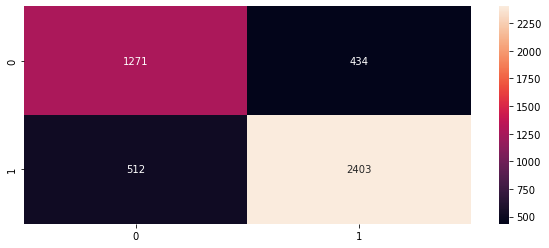

In [214]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,improved_model_2.predict(X_test))
conf_matrix = pd.DataFrame(data=cm)
plt.figure(figsize=(10,4))
sns.heatmap(conf_matrix,annot=True,fmt='d')

In [215]:
TN,FP,FN,TP = confusion_matrix(y_test,improved_model_2.predict(X_test)).ravel()
print('True negative =',TN )
print('False positive =',FP )
print('True positive =',TP )
print('False negaive =',FN )

True negative = 1271
False positive = 434
True positive = 2403
False negaive = 512


In [216]:
# For safety reasons, high false negatives value at 517 than false positives(434) shows that model fits perfectly with 
# predicting that patients won't survive after a year for the most part while they actually would survive.

In [217]:
from sklearn.metrics import classification_report

In [218]:
# See classification report
print(classification_report(y_test,improved_model_2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1705
           1       0.85      0.82      0.84      2915

    accuracy                           0.80      4620
   macro avg       0.78      0.78      0.78      4620
weighted avg       0.80      0.80      0.80      4620



In [219]:
# From the classifiction report above, the model clearly shows ability to figure survivors after a year as well as make 
# correct predictions, given the respective high recall and precision values

In [220]:
# Below constitute sample predictions on an unseen dataset

In [221]:
sample_test_data = pd.read_csv('./hospital_dataset/Test_Data.csv')

In [222]:
sample_test_data.head(3)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [223]:
# Colmns of dataset

In [224]:
sample_test_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond'],
      dtype='object')

In [225]:
# Categorical colmns of test dataset

In [226]:
cat_sample_test_data = sample_test_data.select_dtypes(include='object').columns

In [227]:
cat_sample_test_data

Index(['Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban',
       'Patient_mental_condition'],
      dtype='object')

In [228]:
# Convert numerical into categorical variables on the test dataset

In [229]:
for column in cat_sample_test_data:
    sample_test_data[column] = encoder.fit_transform(sample_test_data[column])

In [230]:
sample_test_data.head(3)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,24,16,29.443894,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,31,24,26.836321,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,29,63,25.523280,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [231]:
# COnfirm absence of categorical columns

In [232]:
sample_test_data.select_dtypes(include='object').columns

Index([], dtype='object')

In [233]:
# Run prediction

In [234]:
sample_test_result = d_tree_classifier.predict(sample_test_data)

In [235]:
sample_test_result

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [236]:
sample_test_result_data = pd.DataFrame(sample_test_result,columns=['prediction'])

In [237]:
# Display result

In [238]:
sample_test_result_data

,prediction
0,1
1,0
2,1
3,0
4,1
...,...
9298,0
9299,1
9300,1
9301,0


In [239]:
# Save predictions in a csv file

In [240]:
sample_test_result_data.to_csv('survival_task.csv',index=False)